# Example analysis: form1 from Cizek & Wollack (2017)

The [CopyDetect](https://cran.r-project.org/web/packages/CopyDetect/) R package includes this sample dataset from Cizek & Wollack (2017).  It represents a real credentialing dataset encompassing 1,636 test takers and their response to 170 items.

Because the items are dichotomous, we can use the binary correct/incorrect indicators as student response choices, and a column set to `"C"` iff the student response == 1 as the student mark.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from genmccd import GenMCCopyDetector
%matplotlib inline

In [2]:
df = pd.read_csv("cizek_wollack_form1.csv")

In [3]:
response_cols = list(sorted([x for x in df.columns if x.startswith("iraw.A")]))

def check_correct(ans):
    return "C" if ans == 1 else "X"
mark_cols = []
for x in response_cols:
    mc = f"{x}.mark"
    mark_cols.append(mc)
    df[mc] = df[x].apply(check_correct)

## Initialize model

In [4]:
%%time
copy_model = GenMCCopyDetector(df, id_col="EID", name_col="EID",
                               alpha=0.5,
                               response_cols=response_cols, 
                               mark_cols=mark_cols)

CPU times: user 2h 30min 19s, sys: 1min, total: 2h 31min 19s
Wall time: 2h 31min 17s


## Visualize pairs for which ratio is > 1

<AxesSubplot:>

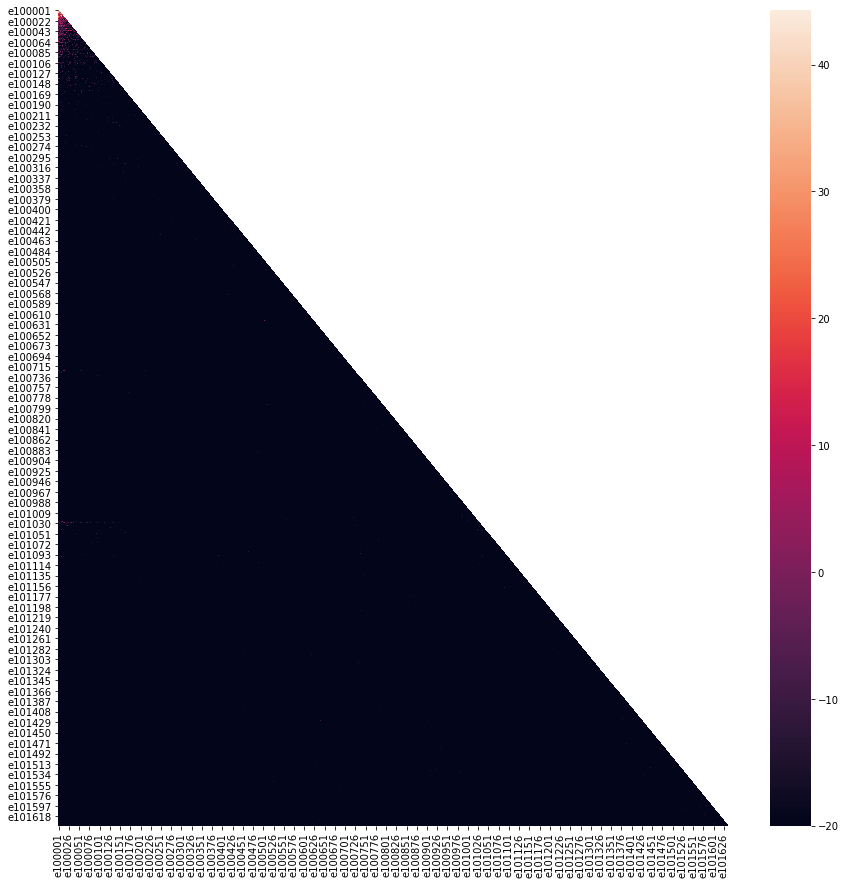

In [12]:
score_df = copy_model.get_copying_logprobs(student_sort_order="id")
plt.figure(figsize=(15,15))
sns.heatmap(score_df, vmin=-20)

## Find top pairs

In [6]:
copy_model.print_top_scores(n=10)

44.29145 e100001              e100009             
41.64614 e100001              e100003             
40.44289 e100001              e100008             
38.63744 e100009              e100012             
38.59292 e100002              e100006             
37.25717 e100002              e100007             
36.62131 e100001              e100004             
35.28561 e100002              e100004             
33.37096 e100001              e100013             
32.57138 e100002              e100011             


## Visualize graph

In [23]:
G = copy_model.get_graph(threshold=25)

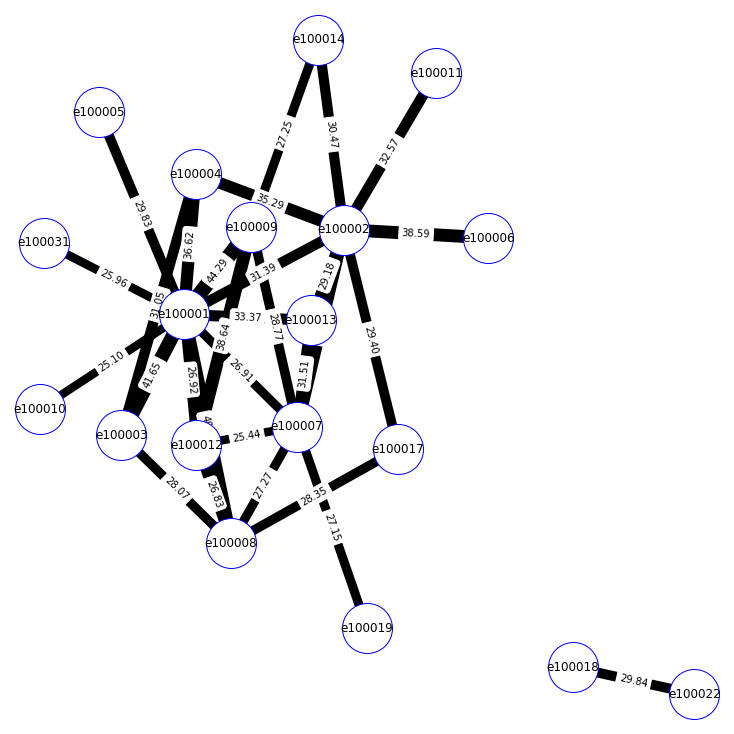

In [24]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout as layout

options = {"with_labels": True, "node_color": "white", 
           "edgecolors": "blue", "node_size": 2500}
pos = layout(G, prog="neato")

plt.figure(figsize=(10,10))
nx.draw(G, pos=pos, **options)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edges(G, pos, width=[x/3 for x in labels.values()])
nx.draw_networkx_edge_labels(G, pos, edge_labels={x:f"{y:2.2f}" for x, y in labels.items()})
plt.show()